In [20]:
# importing libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
column_rename_dict = {
    "PM 2,5": "PM2.5",
    "Partículas Respiráveis (<2,5µm)(µg/m3)": "PM2.5",
    "Partículas Inaláveis (<10µm)(µg/m3)": "PM10",
    "Temperatura (ºC)": "Temperatura",
    "Tº": "Temperatura",
    "Radiação Solar (W/m2)": "Radiação Solar",
    "Monóxido de Carbono (ppm)": "Monóxido de Carbono",
    "CO": "Monóxido de Carbono",
    "Velocidade Escalar do Vento (m/s)": "Velocidade do Vento",
    "Direção Escalar do Vento (grau)": "Direção do Vento",
    "Umidade relativa (%)": "Umidade Relativa",
    "Precipitação Pluviométrica (mm)": "Precipitação",
    "Pressão Atmosférica (mmHg)": "Pressão Atmosférica",
    "Dióxido de enxofre (ppb)": "Dióxido de Enxofre",
    "Ozônio (ppb)": "Ozônio",
    "Monóxido de Nitrogênio (ppb)": "Monóxido de Nitrogênio",
    "Óxidos de Nitrogênio (ppb)": "Óxidos de Nitrogênio",
    "Dióxido de Nitrogênio (ppb)": "Dióxido de Nitrogênio",
    "HCT (ppm)": "HCT",
    "CH4 (ppm)": "Metano",
    "HCNM (ppm)": "HCNM",
    "Monóxido de Carbono Média Móvel (ppm)": "Monóxido de Carbono Média Móvel",
    "Data": "Data",
    "Hora": "Hora",
    "Média Horária": "Média Horária",
    "Seno da direção do vento": "Seno da Direção do Vento",
    "Cosseno da direção do vento": "Cosseno da Direção do Vento",
    "Seno ponderado": "Seno Ponderado",
    "Cosseno ponderado": "Cosseno Ponderado",
    "PM10": "PM10",
    "NO2": "Dióxido de Nitrogênio",
    "O3": "Ozônio",
    "SO2": "Dióxido de Enxofre",
    "DV": "Direção do Vento",
    "PP": "Pressão Atmosférica",
    "PA": "Precipitação",
    "VV": "Velocidade do Vento",
    "RS": "Radiação Solar",
    "UR": "Umidade Relativa"
}

In [22]:
pd.set_option('future.no_silent_downcasting', True)
main_folder = "data"
station_folders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]

In [23]:
# 'describe' dos dados tratados

for station_folder in reversed(station_folders):
    df_treated = pd.read_excel(f"tratados/{station_folder}/excel/{station_folder}_combined_treated.xlsx")
    print(f"Estação: {station_folder}")
    print(df_treated['PM2.5'].describe())
    print("-" * 50)

Estação: Piratininga
count    534406.000000
mean         10.294802
std           7.592998
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max         144.000000
Name: PM2.5, dtype: float64
--------------------------------------------------
Estação: Cascata
count    297030.000000
mean         11.339461
std           8.759707
min           0.100000
25%           6.000000
50%           9.000000
75%          14.000000
max         122.000000
Name: PM2.5, dtype: float64
--------------------------------------------------


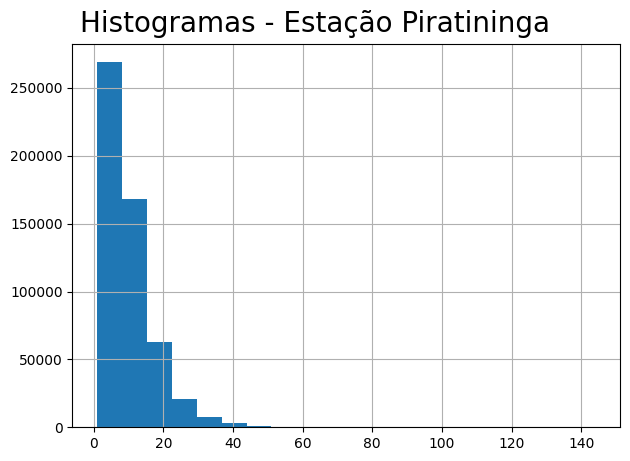

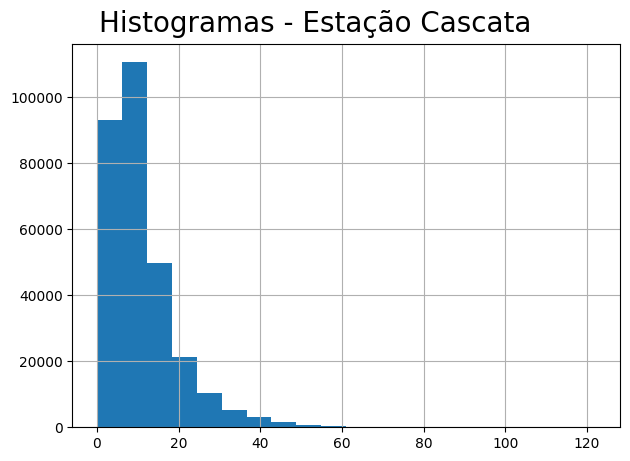

In [27]:
import matplotlib.pyplot as plt

# plotando histogramas
station_folders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]
for station_folder in reversed(station_folders):
    df_treated = pd.read_excel(f"tratados/{station_folder}/excel/{station_folder}_combined_treated.xlsx")
    df_treated['PM2.5'].hist(bins=20)
    plt.suptitle(f"Histogramas - Estação {station_folder}", y=0.95, fontsize=20)
    plt.tight_layout()
    plt.show()
    

In [25]:
    q1 = df_treated['PM2.5'].quantile(0.25)
q3 = df_treated['PM2.5'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df_treated[(df_treated['PM2.5'] < lower_bound) | (df_treated['PM2.5'] > upper_bound)]
print(f"Quantidade de outliers: {len(outliers)}")

df_treated = outliers


Quantidade de outliers: 18036


In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df_treated['Data'], df_treated['PM2.5'])
plt.xlabel('Data')
plt.ylabel('Valor de PM2.5')
plt.title('Variação temporal dos valores de PM2.5')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Data'

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# pega os nomes da estacoes
main_folder = "data"
station_folders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]

#plota os graficos
for station_folder in reversed(station_folders):
    combined_data = pd.read_excel(f"tratados/{station_folder}/excel/{station_folder}_combined_treated.xlsx")
    # Especificando o formato correto da data
    combined_data['Data e Hora'] = pd.to_datetime(combined_data['Data e Hora'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.date
    combined_data = combined_data.set_index('Data e Hora')
    
    # Aumentando o tamanho do gráfico
    plt.figure(figsize=(10, 6))  
    
    combined_data['PM2.5'].plot()
    plt.title(f"{station_folder} PM2.5")
    plt.show()
